In [423]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sn

In [397]:
doencas = pd.read_csv(r'C:\Users\nicol\Documents\Impactos ambientais na saúde\dados\Doencas por municipio.csv')
entorno = pd.read_csv(r'C:\Users\nicol\Documents\Impactos ambientais na saúde\dados\entorno_porc.csv')
#domicilio01 = pd.read_csv(r'C:\Users\nicol\Documents\Impactos ambientais na saúde\dados\Domicilio01 sem SP.csv')
domicilio01 = pd.read_csv(r'C:\Users\nicol\Documents\Impactos ambientais na saúde\dados\Domicilio01_SP2.csv', sep = ';')
domicilio02 = pd.read_csv(r'C:\Users\nicol\Documents\Impactos ambientais na saúde\dados\Domicilio02_SP2.csv', sep = ';')
basico = pd.read_csv(r'C:\Users\nicol\Documents\Impactos ambientais na saúde\dados\Basico_SP2.csv', sep = ';', encoding = "ISO-8859-1")
dados_populacionais = pd.read_csv(r'C:\Users\nicol\Documents\Impactos ambientais na saúde\dados\dados populacionais.csv', sep = ';', encoding = "ISO-8859-1")

#Primeiro tratamos a base domicilio01 para criar as chaves por municipio

#print(domicilio01.head())

domicilio01['cod_municipio'] = domicilio01['Cod_setor'].astype(str).str.slice(0,6)
domicilio01.drop(columns = 'Cod_setor', inplace = True)

#A base de domicilios tem varios campos preenchidos com 'X', temos que retirar eles e substituir por 0 pois mixed data types quebram o groupby

domicilio01 = domicilio01.replace('X', 0)
domicilio01 = domicilio01.astype(float)
domicilio01 = domicilio01.groupby(['cod_municipio']).agg('sum')
domicilio01.index = domicilio01.index.astype(int)
print(domicilio01.head())

#tratamos tratamos a base domicilio02 para criar as chaves por municipio

domicilio02['cod_municipio'] = domicilio02.Cod_setor.astype(str).str.slice(0,6)
domicilio02.drop(columns = 'Cod_setor', inplace = True)

#Por algum motivo o cod_setor das linhas 17097 até 17131 foram salvas como strings, vou eliminei elas da base e depois 
#lidamos com essa pouca quantia de linhas problematicas

#A base de domicilios tem varios campos preenchidos com 'X', temos que retirar eles e substituir por 0 pois mixed data types quebram o groupby

domicilio02 = domicilio02.replace('X', 0)
domicilio02 = domicilio02.astype(int)
domicilio02 = domicilio02.groupby(['cod_municipio']).agg('sum')

#tratamos a base Basico_SP2

#print(basico.keys())
# Tiramos todas as colunas desimportantes
basico['cod_municipio'] = basico.Cod_setor.astype(str).str.slice(0,6)
basico.drop(columns = ['Cod_setor', 'Cod_Grandes Regiões', 'Nome_Grande_Regiao', 'Cod_UF',
       'Nome_da_UF ', 'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro',
       'Cod_RM', 'Nome_da_RM', 'Nome_do_municipio',
       'Cod_distrito', 'Nome_do_distrito', 'Cod_subdistrito',
       'Nome_do_subdistrito', 'Cod_bairro', 'Nome_do_bairro', 'Situacao_setor',
       'Tipo_setor'], inplace = True)
basico = basico.astype(str)
basico = basico.replace(',', '.', regex = True)
basico = basico.astype(float)
basico = basico.groupby(['cod_municipio']).agg('sum')
basico.index = basico.index.astype(int)
#print(basico.head(10))


#tratamos dados populacionais

dados_populacionais.keys()
dados_populacionais.drop(columns = ['ConcatUF+Mun', 'IBGE7', 'UF', 'MunicÃ­pio', 'RegiÃ£o', 'Porte', 'Capital'], inplace = True)


dados_populacionais = dados_populacionais[dados_populacionais['IBGE'].isin(doencas['munic_res'].astype(int))]
dados_populacionais.set_index('IBGE', inplace = True)

print(dados_populacionais.head())
#print(dados_populacionais.shape)

dados_populacionais.columns = ['populacao']
#Com os dados populacionais fazemos calculamos as prevalencias das doencas

doencas.set_index('munic_res', inplace = True)

doencas = doencas.join(dados_populacionais)
doencas['prevalencia respiratorias'] = doencas['doencas_respiratorias'].div(doencas['populacao'])
doencas['prevalencia digestorias'] = doencas['doencas_digestivo'].div(doencas['populacao'])
#print(doencas.head())

               Situacao_setor     V001     V002     V003  V004   V005    V006  \
cod_municipio                                                                   
350010                  170.0  11631.0  11328.0  11050.0   7.0  240.0  6532.0   
350020                   31.0   1200.0   1200.0   1200.0   0.0    0.0   576.0   
350030                  112.0   9958.0   9881.0   9780.0   7.0   80.0  5006.0   
350040                   76.0   2574.0   2506.0   2396.0  16.0   72.0  1366.0   
350050                   56.0   5719.0   5595.0   5027.0  19.0  533.0  3101.0   

                 V007    V008   V009  ...  V232  V233   V234  V235   V236  \
cod_municipio                         ...                                   
350010         1313.0  2430.0  207.0  ...   0.0  24.0  450.0  18.0  108.0   
350020          207.0   245.0   64.0  ...   0.0   2.0   48.0   1.0   16.0   
350030          950.0  2455.0  635.0  ...   0.0  91.0  881.0   5.0   57.0   
350040          161.0   576.0  186.0  ...   0.0

In [398]:
print(doencas.shape)
print(entorno.shape)
print(domicilio01.shape)
print(domicilio02.shape) #Por algum motivo o domicilio02 tem 5 municipios a menos
print(basico.shape)
#print(domicilio02.index)
#print(basico.index)
#print(list(set(domicilio02.index) & set (basico.index)))

(644, 5)
(644, 464)
(644, 242)
(639, 133)
(643, 13)


In [399]:
#Damos merge nos conjuntos de variaveis para fazer a analise
#print(doencas.columns)
#print(entorno.columns)
#print(domicilio01.columns)
#print(domicilio02.columns)
#print(basico.columns)

#Usar o codigo do municipio como indice

entorno.set_index('Cod_muni', inplace = True)
#domicilio01.set_index('cod_municipio', inplace = True)
#domicilio02.set_index('cod_municipio', inplace = True)
#basico.set_index('Cod_municipio', inplace = True)

#doencas.index.to_list()
#entorno.index.to_list()
#domicilio01.index.to_list()
#domicilio02.index.to_list()
#basico.index.to_list()



In [400]:
#Adicionando suffixos para cada um dos nomes de colunas para não ter problemas no join!

doencas = doencas.add_suffix('_doencas')
entorno = entorno.add_suffix('_entorno')
domicilio01 = domicilio01.add_suffix('_domicilio01')
domicilio02 = domicilio02.add_suffix('_domicilio02')
basico = basico.add_suffix('_basico')


In [401]:
#doencas.head(10)
#entorno.head(10)
domicilio01.head(10)
#domicilio02.head(10)
#basico.head(10)

Situacao_setor_domicilio01  V001_domicilio01  V002_domicilio01  \
cod_municipio                                                                   
350010                              170.0           11631.0           11328.0   
350020                               31.0            1200.0            1200.0   
350030                              112.0            9958.0            9881.0   
350040                               76.0            2574.0            2506.0   
350050                               56.0            5719.0            5595.0   
350055                               65.0            1887.0            1871.0   
350060                                7.0            1004.0             990.0   
350070                              104.0           10379.0           10171.0   
350075                               50.0            1547.0            1525.0   
350080                               51.0            1352.0            1348.0   

               V003_domicilio01  V004_domicilio01  V005_domicilio01  \
cod_municipio                                                         
350010                  11050.0               7.0             240.0   
350020                   1200.0               0.0               0.0   
350030                   9780.0               7.0              80.0   
350040                   2396.0              16.0              72.0   
350050                   5027.0              19.0             533.0   
350055                   1827.0               4.0              32.0   
350060                    895.0               6.0              89.0   
350070                  10124.0               1.0              40.0   
350075                   1522.0               1.0               0.0   
350080                   1348.0               0.0               0.0   

               V006_domicilio01  V007_domicilio01  V008_domicilio01  \
cod_municipio                                                         
350010                   6532.0            1313.0            2430.0   
350020                    576.0             207.0             245.0   
350030                   5006.0             950.0            2455.0   
350040                   1366.0             161.0             576.0   
350050                   3101.0             393.0            1516.0   
350055                    967.0             193.0             378.0   
350060                    610.0              44.0             266.0   
350070                   6595.0             993.0            1597.0   
350075                    982.0              67.0             208.0   
350080                    885.0             178.0             135.0   

               V009_domicilio01  ...  V232_domicilio01  V233_domicilio01  \
cod_municipio                    ...                                       
350010                    207.0  ...               0.0              24.0   
350020                     64.0  ...               0.0               2.0   
350030                    635.0  ...               0.0              91.0   
350040                    186.0  ...               0.0              15.0   
350050                    262.0  ...               0.0              32.0   
350055                    201.0  ...               0.0              39.0   
350060                     38.0  ...               0.0               0.0   
350070                    312.0  ...               0.0              77.0   
350075                    167.0  ...               0.0               1.0   
350080                     31.0  ...               0.0               8.0   

               V234_domicilio01  V235_domicilio01  V236_domicilio01  \
cod_municipio                                                         
350010                    450.0              18.0             108.0   
350020                     48.0               1.0              16.0   
350030                    881.0               5.0              57.0   
350040                     79.0               0.0              11.0 

In [402]:
#
df_completo = doencas.join(entorno)
df_completo = df_completo.join(domicilio01)
df_completo = df_completo.join(domicilio02)
df_completo = df_completo.join(basico)

df_completo.fillna(0, inplace = True)

#df_completo = df_completo.join(domicilio01, lsuffix = '_entorno', rsuffix = '_domicilio01')
#df_completo = df_completo.join(domicilio02, lsuffix = '_domicilio01', rsuffix = '_domicilio02')
#df_completo = df_completo.join(basico, lsuffix = '_domicilio02', rsuffix = '_basico')

In [403]:
print(df_completo.columns)
df_completo.shape

Index(['doencas_respiratorias_doencas', 'doencas_digestivo_doencas',
       'populacao_doencas', 'prevalencia respiratorias_doencas',
       'prevalencia digestorias_doencas', 'SITU1_entorno', 'SITU2_entorno',
       'SITU3_entorno', 'SITU4_entorno', 'SITU5_entorno',
       ...
       'V003_basico', 'V004_basico', 'V005_basico', 'V006_basico',
       'V007_basico', 'V008_basico', 'V009_basico', 'V010_basico',
       'V011_basico', 'V012_basico'],
      dtype='object', length=856)


(644, 856)

Agora partimos para a análise de fato.

In [404]:
df_completo.describe()

doencas_respiratorias_doencas  doencas_digestivo_doencas  \
count                     644.000000                 644.000000   
mean                      263.231366                 294.513975   
std                       534.952550                 583.945548   
min                         3.000000                   7.000000   
25%                        35.000000                  41.000000   
50%                        84.500000                  94.500000   
75%                       267.000000                 284.500000   
max                      5924.000000                6023.000000   

       populacao_doencas  prevalencia respiratorias_doencas  \
count       6.440000e+02                         644.000000   
mean        4.659735e+04                           0.007785   
std         1.084658e+05                           0.004850   
min         8.050000e+02                           0.000699   
25%         5.123000e+03                           0.004524   
50%         1.272550e+04                           0.006567   
75%         3.772325e+04                           0.009539   
max         1.221979e+06                           0.032033   

       prevalencia digestorias_doencas  SITU1_entorno  SITU2_entorno  \
count                       644.000000     644.000000     644.000000   
mean                          0.008076       0.820962       0.019535   
std                           0.003149       0.160001       0.071192   
min                           0.001863       0.197536       0.000000   
25%                           0.005826       0.753432       0.000000   
50%                           0.007465       0.869717       0.000000   
75%                           0.009740       0.936036       0.000000   
max                           0.025571       1.000000       0.802464   

       SITU3_entorno  SITU4_entorno  SITU5_entorno  ...  V003_basico  \
count     644.000000     644.000000     644.000000  ...   644.000000   
mean        0.014190       0.002362       0.004121  ...   127.992904   
std         0.046086       0.014356       0.022085  ...   445.948854   
min         0.000000       0.000000       0.000000  ...     0.000000   
25%         0.000000       0.000000       0.000000  ...     0.000000   
50%         0.000000       0.000000       0.000000  ...     9.045000   
75%         0.004312       0.000000       0.000000  ...    76.570000   
max         0.532778       0.214270       0.264434  ...  5735.580000   

       V004_basico   V005_basico   V006_basico   V007_basico   V008_basico  \
count   644.000000  6.440000e+02  6.440000e+02  6.440000e+02  6.440000e+02   
mean     91.923401  5.830399e+04  3.938342e+08  6.547879e+04  4.319827e+08   
std     320.897690  2.405357e+05  2.192579e+09  2.713034e+05  2.526228e+09   
min       0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%       0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%       4.230000  2.752665e+03  1.503750e+06  3.061695e+03  1.275101e+06   
75%      56.612500  2.695579e+04  7.622147e+07  2.919115e+04  7.793665e+07   
max    4229.380000  3.639426e+06  3.606872e+10  4.092727e+06  4.492177e+10   

        V009_basico   V010_basico   V011_basico   V012_basico  
count  6.440000e+02  6.440000e+02  6.440000e+02  6.440000e+02  
mean   3.635674e+04  2.141563e+08  5.445982e+04  2.909440e+08  
std    1.529891e+05  1.179871e+09  2.253325e+05  1.678558e+09  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
50%    1.663405e+03  1.465898e+06  2.786265e+03  1.332471e+06  
75%    1.607901e+04  3.954286e+07  2.339913e+04  5.046845e+07  
max    2.360151e+06  1.967069e+10  3.377045e+06  2.942156e+10  

[8 rows x 856 columns]

prevalencia respiratorias_doencas    1.000000
prevalencia digestorias_doencas      0.550601
V363_entorno                         0.312324
V950_entorno                         0.304787
V901_entorno                         0.303174
V937_entorno                         0.302378
V314_entorno                         0.301053
V877_entorno                         0.299815
V375_entorno                         0.299508
V962_entorno                         0.298439
Name: prevalencia respiratorias_doencas, dtype: float64
prevalencia digestorias_doencas      1.000000
prevalencia respiratorias_doencas    0.550601
V937_entorno                         0.324016
V901_entorno                         0.314459
V962_entorno                         0.309815
V877_entorno                         0.308285
V950_entorno                         0.304660
V350_entorno                         0.287217
V314_entorno                         0.270655
V889_entorno                         0.269248
Name: prevalencia digest

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002A89ED518C8> (for post_execute):


KeyboardInterrupt: 

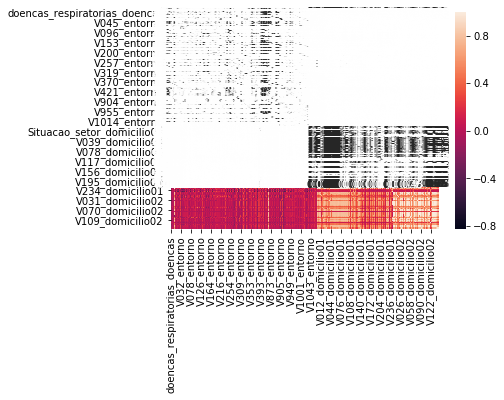

In [424]:
#Matriz de correlação

corr_matrix = df_completo.corr()

#print(corr_matrix['doencas_respiratorias_doencas'])
#print(corr_matrix['doencas_digestivo_doencas'])

#Tabela com valores mais correlacionados a incidência de doencas

top_corr_resp = corr_matrix['prevalencia respiratorias_doencas'].nlargest(10)
top_corr_digest = corr_matrix['prevalencia digestorias_doencas'].nlargest(10)

low_corr_resp = corr_matrix['prevalencia respiratorias_doencas'].nsmallest(10)
low_corr_digest = corr_matrix['prevalencia digestorias_doencas'].nsmallest(10)

print(top_corr_resp)
print(top_corr_digest)

print(low_corr_resp)
print(low_corr_digest)



#top_corr_resp.to_csv(r'C:\Users\nicol\Documents\Impactos ambientais na saúde\dados\top_corr_resp.csv')
#top_corr_digest.to_csv(r'C:\Users\nicol\Documents\Impactos ambientais na saúde\dados\top_corr_digest.csv')
#low_corr_resp.to_csv(r'C:\Users\nicol\Documents\Impactos ambientais na saúde\dados\low_corr_resp.csv')
#low_corr_digest.to_csv(r'C:\Users\nicol\Documents\Impactos ambientais na saúde\dados\low_corr_digest.csv')


In [406]:
#Matriz de covariancia

cov_matrix = df_completo.cov()

#print(cov_matrix['doencas_respiratorias_doencas'])
#print(cov_matrix['doencas_digestivo_doencas'])


Com a esses dados basicos disponíveis, passamos para analises mais complexas. Primeiro fazemos a normalização dos dados para o intervalo (0,1).
Para tanto temos duas opções, normalizar a cada linha como o felipe fez nos dados de entorno ou por coluna. Os dois tem problemas
a principio pois a normalização por linha teria que assumir que a variavel V001 de cada conjunto de dados domicilio01 
e domicilio02 tem a variavel mais geral possível, o que parece ser verdade mas não da para ter certeza. A segunda abordagem
é problematica pois usar os valores dessa maneira pode levar a relações espúrias.



In [408]:
#Abordagem 1 com premissa sobre as ideias das variaveis

#antes de criar o df_completo para fazer a analise dividimos os valores

domicilio01.drop(columns = 'Situacao_setor_domicilio01', inplace = True)
domicilio02.drop(columns = 'Situacao_setor_domicilio02', inplace = True)

#Agora só temos variaveis numericas nos valores e então dividimos. Se os dados forem consistentes e nossa premissa for valida
#nenhum valor aqui deve ser > 1, testamos isso.

domicilio01 = domicilio01.div(domicilio01['V001_domicilio01'], axis = 0) 
domicilio02 = domicilio02.div(domicilio02['V001_domicilio02'], axis = 0)



(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
          SITU1_entorno  SITU2_entorno  SITU3_entorno  SITU4_entorno  \
Cod_muni                                                               
350010         0.944494       0.001149       0.005038            0.0   
350020         0.885833       0.000000       0.015000            0.0   
350030         0.859124       0.017812       0.029147            0.0   
350040         0.756539       0.000000       0.150503            0.0   
350050         0.423414       0.567113       0.000000            0.0   

          SITU5_entorno  SITU6_entorno  SITU7_entorno  SITU8_entorno  \
Cod_muni                                                               
350010              0.0            0.0            0.0       0.049319   
350020              0.0            0.0            0.0       0.099167   
350030              0.0            0.0            0.0       0.093918   
350040              0.0            0.

In [409]:
print(np.where(domicilio01 > 1))
print(np.where(domicilio02 > 1))

#ambos vazios, como gostariamos ¡yay!

print(entorno.head())
print(domicilio01.head())
print(domicilio02.head())

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
          SITU1_entorno  SITU2_entorno  SITU3_entorno  SITU4_entorno  \
Cod_muni                                                               
350010         0.944494       0.001149       0.005038            0.0   
350020         0.885833       0.000000       0.015000            0.0   
350030         0.859124       0.017812       0.029147            0.0   
350040         0.756539       0.000000       0.150503            0.0   
350050         0.423414       0.567113       0.000000            0.0   

          SITU5_entorno  SITU6_entorno  SITU7_entorno  SITU8_entorno  \
Cod_muni                                                               
350010              0.0            0.0            0.0       0.049319   
350020              0.0            0.0            0.0       0.099167   
350030              0.0            0.0            0.0       0.093918   
350040              0.0            0.

In [419]:
#Agora sim podemos dar join nas bases para fazer a analise de PCA. Para ela não precisamos do df de doencas e não usaremos o
#basico pois ele não foi normalizado.

df_completo_pca = entorno.join(domicilio01)
df_completo_pca = df_completo_pca.join(domicilio02)

print(df_completo_pca.isna().sum().sum())
print(df_completo_pca.shape)

#temos aprox 43000 entradas NaN de um total de 538.384 entradas, vamos preencher com 0

df_completo_pca.fillna(0, inplace = True)

pca = PCA(n_components=20)
pca.fit(df_completo_pca)
print(pd.DataFrame(pca.components_,columns=df_completo_pca.columns))

42900
(644, 836)
    SITU1_entorno  SITU2_entorno  SITU3_entorno  SITU4_entorno  SITU5_entorno  \
0    3.850483e-07   1.459482e-09  -1.871721e-08   3.429185e-09  -1.112061e-08   
1   -1.598644e-06   1.530527e-06   1.008224e-06   2.406322e-08   1.811388e-08   
2   -1.530946e-03   5.333071e-05  -4.098372e-06   1.483172e-04  -8.156742e-05   
3   -1.038043e-01   2.259629e-02   6.181635e-03   1.076196e-03   3.659195e-03   
4   -3.584071e-03   1.356594e-02   1.737807e-03   1.673951e-03  -2.090457e-03   
5    6.635524e-02  -2.778641e-02  -9.172869e-04   5.039317e-04  -2.502335e-03   
6    1.333402e-01   6.377801e-03   1.108429e-02   3.109291e-03  -7.828615e-03   
7    7.328039e-03   2.420663e-02   1.063628e-02   1.844638e-03  -3.453811e-03   
8    3.684119e-02  -2.889736e-03   2.136023e-02  -1.940943e-04  -1.804037e-03   
9    2.902550e-02  -1.198137e-03  -1.242295e-02  -2.448832e-03   1.523242e-03   
10   6.515871e-02  -1.192420e-03  -2.658855e-02  -2.269987e-03  -6.698735e-03   
11  -6.0146